In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

plt.rcParams["figure.figsize"] = (6,6)

In [15]:
df = pd.read_pickle('Data/dataset_milestone3.pkl')

In [16]:
df

,Title,Artist,Genre,URL,Hits,Chords,Lyrics,TokenizedLyrics,tf_idf,lexical_complexity,Chords_df,interval_sequence
0,Hallelujah,Jeff Buckley,Rock,https://tabs.ultimate-guitar.com/tab/jeff_buck...,23157554,"[C, Am, C, Am, C, Am, C, Am, F, G, C, G, C, F,...",i heard there was a secret chord that david pl...,"[heard, secret, chord, david, played, pleased,...","{'heard': 0.06606076697293795, 'secret': 0.088...",0.090656,chord root minor major 7th major 7th...,"[-9.0, 9.0, -9.0, 9.0, -9.0, 9.0, -9.0, 4.0, -..."
1,Im Yours,Jason Mraz,Rock,https://tabs.ultimate-guitar.com/tab/jason_mra...,16413451,"[G, D, Em, C, G, D, Em, C, G, D, Em, C, G, D, ...","well you done done me and you bet i felt it, i...","[well, done, done, bet, felt, it,, tried, chil...","{'don': 0.06749892525209408, 'music': 0.053827...",0.075719,chord root minor major 7th major 7th ...,"[5.0, -2.0, 4.0, -7.0, 5.0, -2.0, 4.0, -7.0, 5..."
2,Wonderwall,Oasis,Rock,https://tabs.ultimate-guitar.com/tab/oasis/won...,12091872,"[Em7, G, Dsus4, A7sus4, Em7, G, Dsus4, A7sus4,...",today is gonna be the day that they're gonna t...,"[today, gonna, day, they're, gonna, throw, bac...","{'heard': 0.04545112221889412, 'don': 0.103286...",0.107676,chord root minor major 7th major 7...,"[-3.0, 5.0, -7.0, 5.0, -3.0, 5.0, -7.0, 5.0, -..."
3,Wish You Were Here,Pink Floyd,Rock,https://tabs.ultimate-guitar.com/tab/pink_floy...,10529033,"[Em7, G, Em7, G, Em7, A7sus4, Em7, A7sus4, G, ...","so, so you think you can tell, heaven from hel...","[so,, think, tell,, heaven, hell,, blue, skies...","{'cold': 0.17738530760119117, 're': 0.04458131...",0.133181,chord root minor major 7th major 7t...,"[-3.0, 3.0, -3.0, 3.0, -5.0, 5.0, -5.0, 2.0, 7..."
4,Hey Soul Sister,Train,Rock,https://tabs.ultimate-guitar.com/tab/train/hey...,10423751,"[C, G, Am, F, C, G, Am, F, C, G, Am, F, G, C, ...",your lipstick stains on the front lobe of my l...,"[lipstick, stains, front, lobe, left, side, br...","{'don': 0.045072174119906036, 'you': 0.0604750...",0.102255,chord root minor major 7th major 7th...,"[-7.0, -2.0, 4.0, 5.0, -7.0, -2.0, 4.0, 5.0, -..."
5,Wonderwall,Oasis,Rock,https://tabs.ultimate-guitar.com/tab/oasis/won...,9452644,"[F#m, A, Esus4, B, F#m, A, Esus4, B, F#m, A, E...",today is gonna be the day that they're gonna t...,"[today, gonna, day, they're, gonna, throw, bac...","{'heard': 0.03935016847613902, 'don': 0.089422...",0.102723,chord root minor major 7th major 7t...,"[-3.0, 5.0, -7.0, 5.0, -3.0, 5.0, -7.0, 5.0, -..."
6,The Only Exception,Paramore,Rock,https://tabs.ultimate-guitar.com/tab/paramore/...,9420989,"[G, Dm, Cmaj7, G, Dm, Cmaj7, G, Dm, Cmaj7, G, ...",when i was younger i saw my daddy cry and curs...,"[younger, saw, daddy, cry, curse, wind, mama, ...","{'you': 0.011730649469387785, 'like': 0.013389...",0.046701,chord root minor major 7th major 7th...,"[5.0, 2.0, -7.0, 5.0, 2.0, -7.0, 5.0, 2.0, -7...."
7,Love Story,Taylor Swift,Rock,https://tabs.ultimate-guitar.com/tab/taylor_sw...,8964458,"[C, G, Am, F, C, F, Am, F, C, F, Am, G, F, G, ...",we were both young when i first saw you i clos...,"[young, first, saw, close, eyes, flashback, st...","{'don': 0.08138220859348926, 'really': 0.03751...",0.078454,chord root minor major 7th major 7th ...,"[-7.0, -2.0, 4.0, 5.0, -5.0, -4.0, 4.0, 5.0, -..."
8,Iris,Goo Goo Dolls,Rock,https://tabs.ultimate-guitar.com/tab/goo_goo_d...,8841766,"[Bm, Bsus2, G, D, Em, G, Bm, A, G, D, Em, G, B...",and i'd give up forever to touch you 'cause i ...,"[i'd, give, forever, touch, 'cause, know, feel...","{'don': 0.27428864541810055, 'you': 0.06133729...",0.114617,chord root minor major 7th major 7t...,"[-0.0, 4.0, 5.0, -2.0, -3.0, -4.0, 2.0, 2.0, 5..."
9,Let It Be,The Beatles,Rock,https://tabs.ultimate-guitar.com/tab/the_beatl...,8786451,"[C, G, Am, Fmaj7, F6, C, G, F, C/E, Dm, C, C, ...","when i find myself in times of trouble, mother...","[find, times, trouble,, mother, mary, comes, s...","{'music': 0.03589833848543034, 'broken': 0.033...",0.090820,chord root minor major 7th m

From this data, as a first measure of complexity in both dimension, we observe the joint distribution of the number of chords with the length of the tokenized lyrics (number of relevant words) :

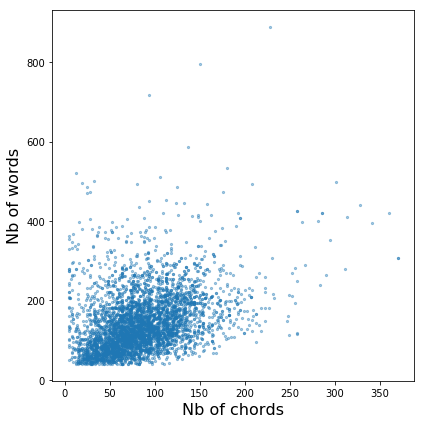

In [30]:
plt.scatter(df.Chords.apply(len), df.TokenizedLyrics.apply(len), s=5, alpha=0.4)
plt.xlabel("Nb of chords", fontsize=16)
plt.ylabel("Nb of words", fontsize=16)
plt.tight_layout()
plt.savefig("figures/nb_words_x_chords.pdf")
plt.show()

And then the joint distribution of number of distinct chords with the number of unique relevant words :

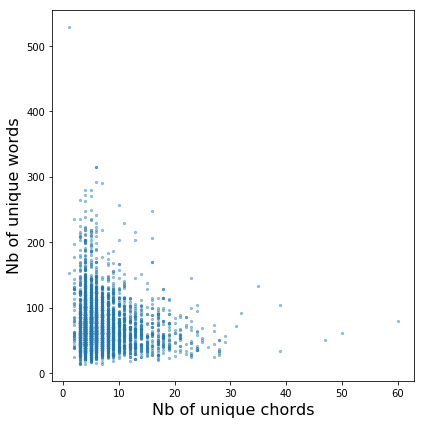

In [31]:
plt.scatter(df.Chords.apply(set).apply(len), df.TokenizedLyrics.apply(set).apply(len), s=5, alpha=0.4)
plt.xlabel("Nb of unique chords", fontsize=16)
plt.ylabel("Nb of unique words", fontsize=16)
plt.tight_layout()
plt.savefig("figures/unique_words_x_chords.pdf")
plt.show()

Those plots show no clear correlation.
We can however note one interesting remark : we see on the second plot that the song the most unique words consist of less than 10 distinct chords. This is due the fact that some tabs don't repeat a chord sequence if it is repeated during the whole song. Plus, those songs are dense lyrically, as they are mostly folk, country or hip-hop songs.
This is also observed while computing the comp2 measure further down.

In [73]:
df[(df.Chords.apply(set).apply(len) < 10) & (df.TokenizedLyrics.apply(set).apply(len) > 200)]

,Title,Artist,Genre,URL,Hits,Chords,Lyrics,TokenizedLyrics,tf_idf,lexical_complexity,Chords_df,interval_sequence,comp1,comp2,harmonic_complexity
374,Hurricane,Bob Dylan,Rock,https://tabs.ultimate-guitar.com/tab/bob_dylan...,890241,"[Am, F, Am, F, Am, F, Am, F, Am, F, Am, F, C, ...",pistol shots ring out in the barroom night ent...,"[pistol, shots, ring, barroom, night, enter, p...","{'don': 0.022621814452995093, 'really': 0.0208...",0.045782,chord root minor major 7th major 7th...,"[4.0, -4.0, 4.0, -4.0, 4.0, -4.0, 4.0, -4.0, 4...",0.698246,0.020979,-4.223417
534,Hurricane,Bob Dylan,Folk,https://tabs.ultimate-guitar.com/tab/bob_dylan...,890241,"[Am, F, Am, F, Am, F, Am, F, Am, F, Am, F, C, ...",pistol shots ring out in the barroom night ent...,"[pistol, shots, ring, barroom, night, enter, p...","{'don': 0.022621814452995093, 'really': 0.0208...",0.045782,chord root minor major 7th major 7th...,"[4.0, -4.0, 4.0, -4.0, 4.0, -4.0, 4.0, -4.0, 4...",0.698246,0.020979,-4.223417
703,Land Locked Blues,Bright Eyes,Folk,https://tabs.ultimate-guitar.com/tab/bright_ey...,448905,"[C, G, C, C, G, C, Am, G, C, Am, C, G, C, C, G...","if you walk away, i'll walk away first tell me...","[walk, away,, i'll, walk, away, first, tell, r...","{'heard': 0.03679837062958848, 'don': 0.117073...",0.056288,chord root minor major 7th major 7th...,"[-7.0, 7.0, -0.0, -7.0, 7.0, -9.0, 2.0, 7.0, -...",0.726776,0.027174,-3.924635
1345,A Boy Named Sue,Johnny Cash,Country,https://tabs.ultimate-guitar.com/tab/johnny_ca...,388027,"[G, G, G, C, D, G, G, C, D, G, G, C, D, G, G, ...",well my daddy left home when i was three and h...,"[well, daddy, left, home, three, didn't, leave...","{'heard': 0.07536283377979995, 'don': 0.017126...",0.062051,chord root minor major 7th major 7th ...,"[-0.0, -0.0, 7.0, -2.0, -5.0, -0.0, 7.0, -2.0,...",0.012048,0.035714,-7.751045
1453,A Boy Named Sue,Johnny Cash,Country,https://tabs.ultimate-guitar.com/tab/johnny_ca...,239677,"[A, D, E, A, A, D, E, A, A, D, E, A, A, D, E, ...",my daddy left home when i was three and he did...,"[daddy, left, home, three, didn't, leave, much...","{'heard': 0.07818661386124968, 'don': 0.017767...",0.062714,chord root minor major 7th major 7th ...,"[7.0, -2.0, -5.0, -0.0, 7.0, -2.0, -5.0, -0.0,...",0.012987,0.038462,-7.601902
2904,Knock You Down,Keri Hilson,Contemporary R&b,https://tabs.ultimate-guitar.com/tab/keri_hils...,330579,"[C, D, G, C, D, Em, C, D, G, C, D, Em, C, D, G...","keep rockin', and keep knockin', whether you l...","[keep, rockin',, keep, knockin',, whether, lou...","{'don': 0.04180505190847944, 'you': 0.01495772...",0.038793,chord root minor major 7th major 7th...,"[-2.0, -5.0, 7.0, -2.0, -2.0, 4.0, -2.0, -5.0,...",0.342282,0.026667,-4.696462
2968,American Boy,Estelle,Contemporary R&b,https://tabs.ultimate-guitar.com/tab/estelle/a...,202129,"[Amaj7, F, Dm, E7, Amaj7, F, Dm, Amaj7, F, Dm,...",just another one champion sound me and estelle...,"[another, one, champion, sound, estelle, get, ...","{'heard': 0.05666490768314853, 'don': 0.038630...",0.057202,chord root minor major 7th major 7th...,"[4.0, 3.0, -2.0, -5.0, 4.0, 3.0, -7.0, 4.0, 3....",6.333333,0.129032,-0.201866
3047,American Boy,Estelle,Contemporary R&b,https://tabs.ultimate-guitar.com/tab/estelle/a...,132841,"[Emaj7, Cmaj7, Am7, Fmaj7, Emaj7, Cmaj7, Am7, ...","verses that are sung by kanye are noted, other...","[verses, sung, kanye, noted,, otherwise, estel...","{'heard': 0.033845818066798004, 'don': 0.01538...",0.040887,chord root minor major 7th major 7th...,"[4.0, -9.0, 4.0, 1.0, 4.0, -9.0, 4.0, 1.0, 4.0...",1.568000,0.039683,-2.777043
3612,Where Is The Love,The Black Eyed Peas,Hip Hop,https://tabs.ultimate-guitar.com/tab/the_black...,661286,"[F, C, Dm, Bb, F, C, Dm, Bb, F, C, Dm, Bb, F, ...","what's wrong with the world, mama people livin...","[what's, wrong, world,, mama, people, livin', ...","{'secret': 0.030313495159204663, 'don': 0.0310...",0.050052,chord root minor major 7th major 7th ...,"[5.0, -2.0, -8.0, 5.0, 5.0, -2

At the end of the last milestone we computed for each song a dataframe of all the informations in its chord sequence, like this one, for example :

In [7]:
df.loc[4445].Chords_df

,chord,root,minor,major,7th,major 7th,augmented,add,diminished,suspended,power chord,6th,9th,11th,13th,specified bass note
0,Am7,A,True,False,True,False,False,False,False,False,False,False,False,False,False,None
1,Bm7,B,True,False,True,False,False,False,False,False,False,False,False,False,False,None
2,C,C,False,True,False,False,False,False,False,False,False,False,False,False,False,None
3,D,D,False,True,False,False,False,False,False,False,False,False,False,False,False,None
4,Am7,A,True,False,True,False,False,False,False,False,False,False,False,False,False,None
5,E,E,False,True,False,False,False,False,False,False,False,False,False,False,False,None
6,Bm7,B,True,False,True,False,False,False,False,False,False,False,False,False,False,None
7,Am7,A,True,False,True,False,False,False,False,False,False,False,False,False,False,None
8,Am7,A,True,False,True,False,False,False,False,False,False,False,False,False,False,None
9,C,C,False,True,False,False,False,False,False,False,False,False,False,False,False,None


From this, we now compute a new dataframe that counts for each song the number of transitions to and from specific chord quality. For example, how many times we go from a "normal" (major or minor) chord to a 7th chord and the other way around, and that for each quality that we listed in our previous dataframe.

In [17]:
# dataframe with the number of transitions to and from specific chord quality for each song
# major and minor transitions are equal because they are complementary
transitions = df.Chords_df.apply(lambda df : df.set_index(['chord', 'root']).astype(bool).astype(int).diff().abs().sum().astype(int))

# number of non-zero columns (major and minor counts as only one column)
transitions["dimension"] = (transitions.iloc[:,1:] != 0).sum(1)

# sum of those columns (once again, we only count minor and major once)
transitions["nb_variations"] = transitions.iloc[:,1:].sum(1)

# size of the set of different chords in the song
transitions["nb_unique_chords"] = df.Chords.apply(set).apply(len)

# total number of chords in the sequence
transitions["nb_chords"] = df.Chords.apply(len)

transitions

,minor,major,7th,major 7th,augmented,add,diminished,suspended,power chord,6th,9th,11th,13th,specified bass note,dimension,nb_variations,nb_unique_chords,nb_chords
0,54,54,10,0,0,0,0,0,0,0,0,0,0,0,2,66,5,119
1,32,32,8,0,0,0,0,0,0,0,0,0,0,0,2,42,6,73
2,104,104,104,0,0,38,0,34,4,0,38,0,0,6,7,335,13,154
3,35,35,17,0,0,0,0,12,0,0,0,0,0,12,4,80,7,51
4,28,28,0,0,0,0,0,0,0,0,0,0,0,0,1,29,4,113
5,120,120,0,0,0,0,0,52,0,0,0,0,0,0,2,174,5,170
6,40,40,34,34,0,0,0,0,0,0,0,0,0,0,3,111,7,70
7,34,34,0,0,0,0,0,0,0,0,0,0,0,0,1,35,7,80
8,93,93,0,0,0,0,0,10,0,0,0,0,0,24,3,130,8,158
9,50,50,12,12,0,0,0,0,0,12,0,0,0,40,5,131,11,142


The dimension feature counts the number of different qualities in the song, which allows us to weight the total number of "quality transitions". 
Major and minor only count as one column, as they are complementary (and not really complex), but more complex qualities like augmentation or addition count double because they are usually followed by a 6th or a 9th or any other additional tone, hence counting twice in our column representation.

We know compute the harmonic complexity of all the song according to our metric established in the README.

In [18]:
df["comp1"] = (transitions["dimension"]*transitions["nb_variations"]+1)/(transitions["nb_chords"]-1)
df.comp1

0        1.127119
1        1.180556
2       15.333333
3        6.420000
4        0.267857
5        2.065089
6        4.840580
7        0.455696
8        2.490446
9        4.652482
10       0.545455
11       0.500000
12       2.486486
13       0.971910
14       0.742857
15       1.087912
16       6.009259
18       0.481132
19       0.507042
20       1.505814
21       1.482143
22       1.595238
23       8.420290
24       0.511811
25      13.217391
26       0.526316
27      10.401786
28       1.406977
29       1.396040
30       1.790000
          ...    
5165     6.571429
5166     0.021277
5167     0.747899
5169     1.340909
5172     0.125000
5173     0.034483
5175     2.240876
5176     0.142857
5177     4.625000
5178     0.887097
5179     0.300000
5180     2.797619
5181     1.000000
5182     0.010989
5183     1.140625
5184     0.011236
5185     0.109375
5186    15.584906
5187     0.022222
5188     0.040000
5189     0.400000
5190     0.608696
5192     0.409091
5193     8.144578
5194     1

In [19]:
df.comp1.describe()

count    4707.000000
mean        1.997870
std         2.833699
min         0.003922
25%         0.494185
50%         0.764706
75%         2.234305
max        22.321429
Name: comp1, dtype: float64

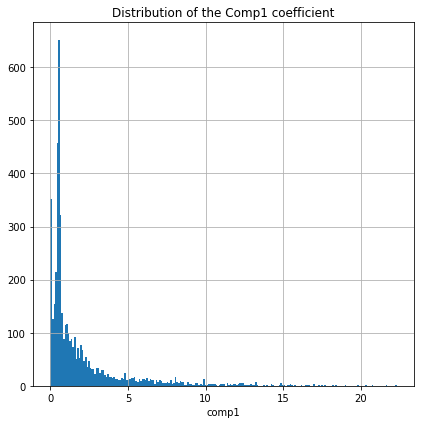

In [23]:
df.comp1.hist(bins=220)
plt.title("Distribution of the Comp1 coefficient")
plt.xlabel("comp1")
plt.tight_layout()
plt.savefig("figures/comp1_distribution.pdf")
plt.show()

In [24]:
df["comp2"] = transitions["nb_unique_chords"]/transitions["nb_chords"]
df.comp2

0       0.042017
1       0.082192
2       0.084416
3       0.137255
4       0.035398
5       0.029412
6       0.100000
7       0.087500
8       0.050633
9       0.077465
10      0.088889
11      0.034783
12      0.080000
13      0.039106
14      0.047170
15      0.054348
16      0.137615
18      0.046729
19      0.055556
20      0.028902
21      0.044248
22      0.047337
23      0.100000
24      0.031250
25      0.053763
26      0.051724
27      0.106195
28      0.068966
29      0.058824
30      0.099010
          ...   
5165    0.500000
5166    0.062500
5167    0.066667
5169    0.101124
5172    0.444444
5173    0.100000
5175    0.086957
5176    0.181818
5177    0.272727
5178    0.063492
5179    0.636364
5180    0.094118
5181    0.176471
5182    0.032609
5183    0.092308
5184    0.033333
5185    0.092308
5186    0.092593
5187    0.065217
5188    0.153846
5189    0.062500
5190    0.208333
5192    0.088889
5193    0.154762
5194    0.037594
5195    0.200000
5196    0.444444
5197    0.2500

In [25]:
df.comp2.describe()

count    4707.000000
mean        0.105099
std         0.100921
min         0.006667
25%         0.050847
50%         0.076923
75%         0.121951
max         1.000000
Name: comp2, dtype: float64

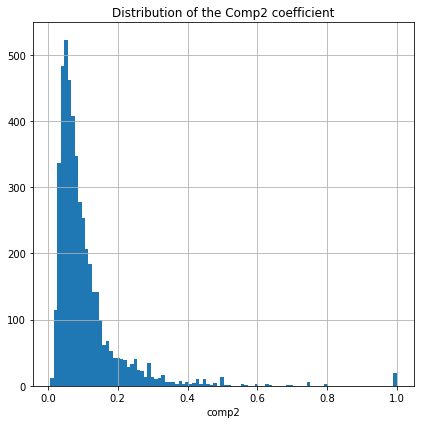

In [27]:
df.comp2.hist(bins=100)
plt.title("Distribution of the Comp2 coefficient")
plt.xlabel("comp2")
plt.tight_layout()
plt.savefig("figures/comp2_distribution.pdf")
plt.show()

In [68]:
df[df.comp2>0.8]

,Title,Artist,Genre,URL,Hits,Chords,Lyrics,TokenizedLyrics,tf_idf,lexical_complexity,Chords_df,interval_sequence,comp1,comp2,harmonic_complexity
1735,Good Feeling,Flo Rida,Electronic,https://tabs.ultimate-guitar.com/tab/flo_rida/...,287576,"[Cm#, E, B, A]","oh, sometimes i get a good feeling, yeah get a...","[oh,, sometimes, get, good, feeling,, yeah, ge...","{'like': 0.06762125309951215, 'king': 0.042656...",0.065348,chord root minor major 7th major 7th ...,"[-4.0, -7.0, 2.0]",1.000000,1.0,0.000000
1865,What Is Love,Haddaway,Electronic,https://tabs.ultimate-guitar.com/tab/haddaway/...,134745,"[F#m, A, C#m, E]","what is love? baby, don't hurt me. don't hurt ...","[love?, baby,, don't, hurt, me., don't, hurt, ...","{'don': 0.299079421612004, 'care': 0.020317269...",0.077833,chord root minor major 7th major 7th ...,"[-3.0, 8.0, -3.0]",1.666667,1.0,0.510826
2286,Mad,Ne-Yo,Rhythm And Blues,https://tabs.ultimate-guitar.com/tab/ne-yo/mad...,165033,"[C, G, Am, F]",just keep repeating it. shes starin at me i'm ...,"[keep, repeating, it., shes, starin, i'm, sitt...","{'don': 0.14952747878605327, 'you': 0.06173133...",0.074358,chord root minor major 7th major 7th ...,"[-7.0, -2.0, 4.0]",1.333333,1.0,0.287682
3007,Mad,Ne-Yo,Contemporary R&b,https://tabs.ultimate-guitar.com/tab/ne-yo/mad...,165033,"[C, G, Am, F]",just keep repeating it. shes starin at me i'm ...,"[keep, repeating, it., shes, starin, i'm, sitt...","{'don': 0.14952747878605327, 'you': 0.06173133...",0.074358,chord root minor major 7th major 7th ...,"[-7.0, -2.0, 4.0]",1.333333,1.0,0.287682
3634,Good Feeling,Flo Rida,Hip Hop,https://tabs.ultimate-guitar.com/tab/flo_rida/...,287576,"[Cm#, E, B, A]","oh, sometimes i get a good feeling, yeah get a...","[oh,, sometimes, get, good, feeling,, yeah, ge...","{'like': 0.06762125309951215, 'king': 0.042656...",0.065348,chord root minor major 7th major 7th ...,"[-4.0, -7.0, 2.0]",1.000000,1.0,0.000000
3641,Thrift Shop,Macklemore,Hip Hop,https://tabs.ultimate-guitar.com/tab/macklemor...,239417,"[Em, G, A, B, D]",i'm gonna pop some tags only got twenty dollar...,"[i'm, gonna, pop, tags, got, twenty, dollars, ...","{'don': 0.016373361892183236, 'like': 0.066867...",0.064854,chord root minor major 7th major 7th ...,"[-3.0, -2.0, -2.0, 9.0]",0.750000,1.0,-0.287682
3665,Aicha,Outlandish,Hip Hop,https://tabs.ultimate-guitar.com/tab/outlandis...,177126,"[Bm, G, D, A]","so sweet, so beautiful everyday like a queen o...","[sweet,, beautiful, everyday, like, queen, thr...","{'lord': 0.020855228233939444, 'don': 0.048206...",0.046983,chord root minor major 7th major 7th ...,"[4.0, 5.0, -7.0]",1.000000,1.0,0.000000
3722,Wild Ones,Flo Rida,Hip Hop,https://tabs.ultimate-guitar.com/tab/flo_rida/...,91749,"[G, D, Em, C]",hey i heard you were a wild one oooh if i took...,"[hey, heard, wild, one, oooh, took, home, it'd...","{'heard': 0.24463555802941517, 'don': 0.049415...",0.059952,chord root minor major 7th major 7th ...,"[5.0, -2.0, 4.0]",1.333333,1.0,0.287682
3839,Crew Love,Drake,Hip Hop,https://tabs.ultimate-guitar.com/tab/drake/cre...,44939,"[C, D, Em, G]","listen, listen, woah, listen, oooh take your n...","[listen,, listen,, woah,, listen,, oooh, take,...","{'really': 0.04594513302376009, 'like': 0.0508...",0.054451,chord root minor major 7th major 7th ...,"[-2.0, -2.0, -3.0]",1.333333,1.0,0.287682
3856,Xoxo,Casper,Hip Hop,https://tabs.ultimate-guitar.com/tab/casper/xo...,40465,"[Cm, Bb, Gm, G#, Am, G, Em, F]","nur nicht stressen lassen, kurz vergessen mach...","[nur, nicht, stressen, lassen,, kurz, vergesse...","{'baby': 0.01360277906653454, 'war': 0.0253982...",0.075030,chord root minor major 7th major 7th ...,"[-10.0, 3.0, -1.0, -1.0, 2.0, 3.0, -1.0]",1.285714,1.0,0.251314


We see here a caveat : for songs that only have a few distinct chords repeated throughout the whole song, some tabs do not repeat them, but only display them once with the indication of repetition. That leads to a very high value of comp2 as there is about the same number of unique chords and total chords in the tab.

In [26]:
df["harmonic_complexity"] = np.log(df.comp1*df.comp2)

In [27]:
df.harmonic_complexity.describe()

count    4707.000000
mean       -2.649091
std         1.801226
min       -10.014582
25%        -3.651133
50%        -2.720418
75%        -1.475353
max         2.383052
Name: harmonic_complexity, dtype: float64

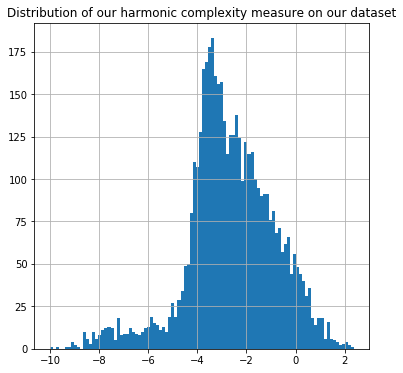

In [28]:
df.harmonic_complexity.hist(bins=100)
plt.title("Distribution of our harmonic complexity measure on our dataset")
plt.show()

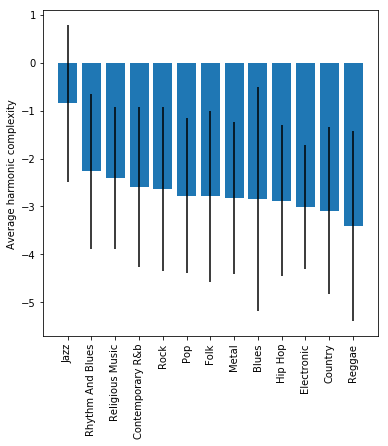

In [62]:
sorted_avg_harmonic_complexity = df.groupby("Genre").harmonic_complexity.mean().sort_values(ascending=False)
plt.bar(np.arange(df.Genre.nunique()), sorted_avg_harmonic_complexity, yerr=df.groupby("Genre").harmonic_complexity.std()[sorted_avg_harmonic_complexity.keys()])
plt.xticks(np.arange(df.Genre.nunique()), sorted_avg_harmonic_complexity.keys(), rotation=90)
plt.ylabel("Average harmonic complexity")
plt.show()

All the average complexities are very similar here and the standard error rates are quite high, but it is notable that one genre is significantly more complex harmonically and it is jazz, which makes sense.

In [40]:
df.lexical_complexity.describe()

count    4707.000000
mean        0.095569
std         0.028612
min         0.015326
25%         0.076308
50%         0.092934
75%         0.112757
max         0.258377
Name: lexical_complexity, dtype: float64

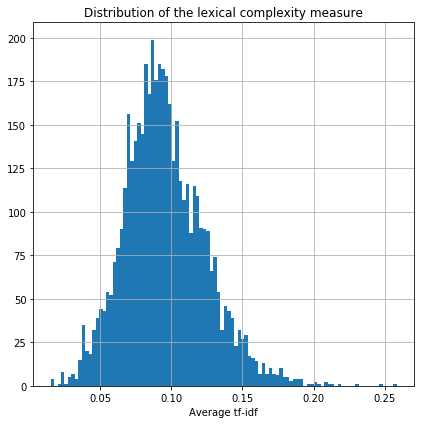

In [11]:
df.lexical_complexity.hist(bins=100)
plt.title("Distribution of the lexical complexity measure")
plt.xlabel("Average tf-idf")
plt.tight_layout()
plt.savefig("figures/lexical_distribution.pdf")
plt.show()

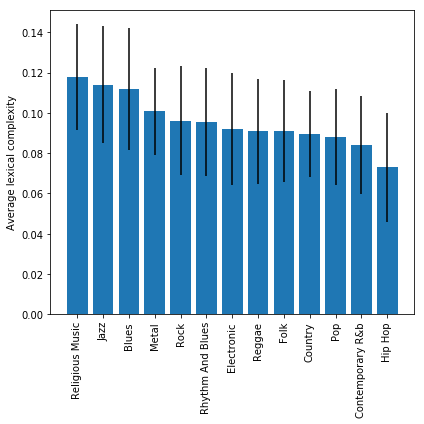

In [28]:
sorted_avg_lexical_complexity = df.groupby("Genre").lexical_complexity.mean().sort_values(ascending=False)
plt.bar(np.arange(df.Genre.nunique()), sorted_avg_lexical_complexity, yerr=df.groupby("Genre").lexical_complexity.std()[sorted_avg_lexical_complexity.keys()])
plt.xticks(np.arange(df.Genre.nunique()), sorted_avg_lexical_complexity.keys(), rotation=90)
plt.ylabel("Average lexical complexity")
plt.tight_layout()
plt.savefig("figures/avg_lexical_genre.pdf")
plt.show()

Once again, all genre-averaged complexities are in a reduced range with high errors, making it difficult to comment. We can still note that, with that metric, religious music is the most complex lyrically and hip-hop the least complex, which is probably due by the nature of our dataset, as it is meant for guitar only, it is probably not the most relevant or accurate concerning hip-hop and rap music which feature no to little guitar.

In [30]:
df.to_pickle("Data/final_results.pkl")

Finally, we draw the scatter plot of the joint distribution between our lyrical and harmonic complexities to see if we can observe a correlation.

In [44]:
# dict to associate each genre with a color
genre_to_color = dict(zip(df.Genre.unique(),sns.color_palette("hls", df.Genre.nunique())))

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
for (genre,color) in zip(df.Genre.unique(),sns.color_palette("hls", df.Genre.nunique())):
    ax.scatter(df[df.Genre==genre].lexical_complexity, df[df.Genre==genre].harmonic_complexity, c=color, label=genre, s=5, alpha=0.8)
plt.xlabel("Lyrical complexity")
plt.ylabel("Harmonic complexity")
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'harmonic_complexity'

There is apparently no clear relation between those 2 measures.

We plot now only one the mean centroid of each genre to see if they show big differences :

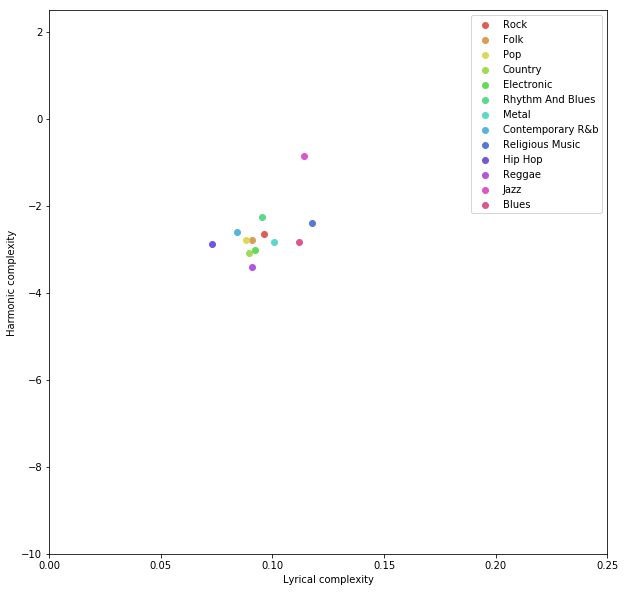

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
for (genre,color) in zip(df.Genre.unique(),sns.color_palette("hls", df.Genre.nunique())):
    df_genre = df[df.Genre==genre]
    ax.scatter(df_genre.lexical_complexity.mean(), df_genre.log_harmonic_complexity.mean(), c=color, label=genre)
plt.xlabel("Lyrical complexity")
plt.ylabel("Harmonic complexity")
plt.xlim(0,0.25)
plt.ylim(-10,2.5)
plt.legend()
plt.show()

The version above is necessary for scale, in order to compare it with the full scatter plot.
Here is a zoomed version for a better readability :

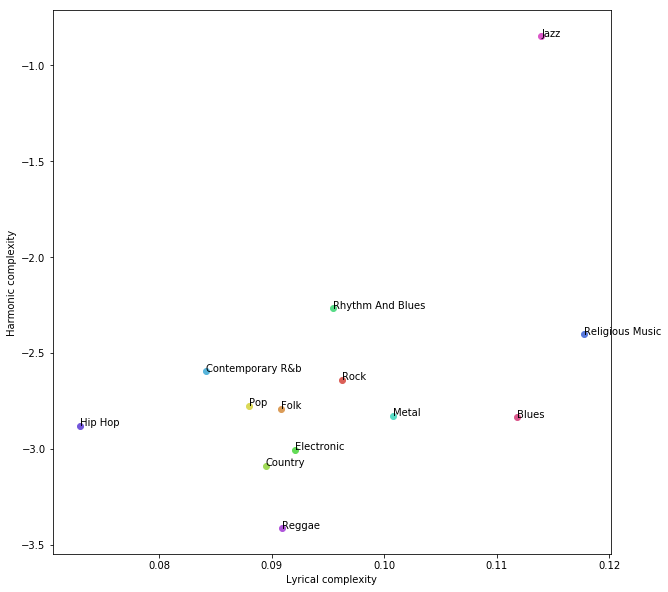

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
for (genre,color) in zip(df.Genre.unique(),sns.color_palette("hls", df.Genre.nunique())):
    df_genre = df[df.Genre==genre]
    ax.scatter(df_genre.lexical_complexity.mean(), df_genre.log_harmonic_complexity.mean(), c=color, label=genre)
    ax.annotate(genre, (df_genre.lexical_complexity.mean(), df_genre.log_harmonic_complexity.mean()))
plt.xlabel("Lyrical complexity")
plt.ylabel("Harmonic complexity")
plt.xlim(0.07,0.13)
plt.show()

As we already observed on the bar plots of the average complexities, only jazz music really differs from the genres, with the highest harmonic complexity by far, and the second highest lyrical complexity, only bested by religious music, which is probably considered "complex" by our tf-idf measure because of its specific vocabulary.

As a general conclusion, our study shows no clear correlation or link between harmonical and lyrical complexity in a dataset of guitar versions of popular songs.